In [74]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt

# VLIZ management indicators

## Annual growth of the Open Marine Archive (ind#20)

The number of publications that is added to the OMA special collection (id: 221) on a yearly basis.  

Property that is inspected: the date the metadata record was created ~ assuming this is the date the publication was added to the OMA special collection

In [101]:
OMA_pubs = execute_to_df("OMA_pubs.sparql")
OMA_pubs

,collection,title,publication,publish_date,md_created,md_modified
0,https://marineinfo.org/id/collection/221,OMA,https://marineinfo.org/id/publication/311528,2018-01-01,2019-05-28,2019-06-06
1,https://marineinfo.org/id/collection/221,OMA,https://marineinfo.org/id/publication/342733,1973-01-01,2021-08-16,2021-08-16
2,https://marineinfo.org/id/collection/221,OMA,https://marineinfo.org/id/publication/232443,2014-01-01,2014-01-02,2018-05-17
3,https://marineinfo.org/id/collection/221,OMA,https://marineinfo.org/id/publication/332034,2020-01-01,2020-12-15,2021-01-27
4,https://marineinfo.org/id/collection/221,OMA,https://marineinfo.org/id/publication/144120,2010-01-01,2010-03-11,2021-03-16
...,...,...,...,...,...,...
655,https://marineinfo.org/id/collection/221,OMA - Open Marien Archief,https://marineinfo.org/id/publication/122198,2008-01-01,2008-05-09,2012-12-05
656,https://marineinfo.org/id/collection/221,OMA - Open Marien Archief,https://marineinfo.org/id/publication/78001,1866-01-01,2005-11-28,2005-11-28
657,https://marineinfo.org/id/collection/221,OMA - Open Marien Archief,https://marineinfo.org/id/publication/250584,1984-01-01,2015-10-19,2015-10-19
658,https://marineinfo.org/id/collection/221,OMA - Open Marien Archief,https://marineinfo.org/id/publication/254046,1974-01-01,2016-03-14,2016-03-14


In [113]:
print(f"There are {OMA_pubs.groupby('publication').nunique().shape[0]} publications in the 'Open Marine Archive' special collection.")

There are 330 publications in the 'Open Marine Archive' special collection.


In [102]:
# manipulate date datatype
OMA_pubs['md_created'] = pd.to_datetime(OMA_pubs['md_created'])
OMA_pubs['md_created_year'] = OMA_pubs['md_created'].dt.year

# assess publications with missing publish_date
OMA_pubs_with_missing_md_created_year = len(OMA_pubs[OMA_pubs['md_created_year'].isnull()])
print(f'number of publications with missing publish date: {OMA_pubs_with_missing_md_created_year}')

# replace all NaN values with zeros & convert from float to int
#OMA_pubs['publish_year'] = OMA_pubs['publish_year'].fillna(0).astype(int)

number of publications with missing publish date: 0


In [112]:
OMA_pubs_year = OMA_pubs.groupby('md_created_year').nunique()

In [106]:
# calculate number & cummulative number of publications per publish year 
OMA_pubs_year['publication_cumsum'] = OMA_pubs_year['publication'].cumsum(skipna=False)

In [107]:
# Table
OMA_pubs_year.rename(columns={
    'publication': 'Number of publications', 
    'publication_cumsum': 'Cummulative number of publications'}, inplace=True)

OMA_pubs_year.transpose()

md_created_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
collection,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
title,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Number of publications,2,13,6,8,6,7,9,6,8,3,...,12,11,9,24,21,26,37,15,11,3
publish_date,2,13,3,8,4,5,5,2,6,3,...,7,9,7,15,4,10,24,9,5,2
md_created,1,13,6,7,6,7,8,6,6,3,...,10,9,8,16,4,16,20,14,10,3
md_modified,2,13,5,8,6,7,8,6,8,3,...,10,9,8,20,8,19,23,15,9,3
Cummulative number of publications,2,15,21,29,35,42,51,57,65,68,...,173,184,193,217,238,264,301,316,327,330


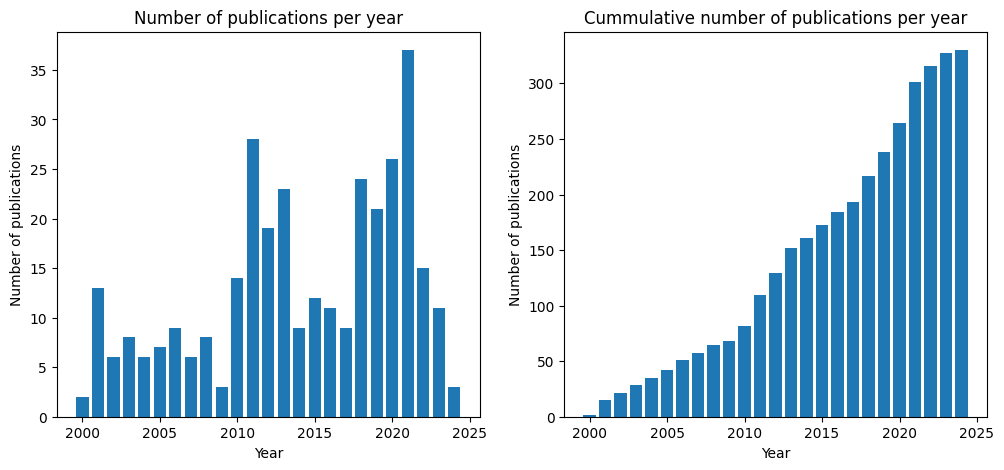

In [111]:
warnings.filterwarnings('ignore')
# Horizontal barplot of number of publiations per publish year
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].bar(OMA_pubs_year.index.astype(int), OMA_pubs_year['Number of publications'])
ax[0].set_title('Number of publications per year')
ax[0].set_ylabel('Number of publications')
ax[0].set_xlabel('Year')

ax[1].bar(OMA_pubs_year.index.astype(int), OMA_pubs_year['Cummulative number of publications'])
ax[1].set_title('Cummulative number of publications per year')
ax[1].set_ylabel('Number of publications')
ax[1].set_xlabel('Year')

plt.show()